## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
import os
print(os.getcwd())  # shows your current working directory

/Users/vaishnaviawadhiya/Downloads/Plant_Disease_Dataset


In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/vaishnaviawadhiya/Downloads/Plant_Disease_Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


2025-04-24 22:32:33.443985: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-24 22:32:33.444218: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-24 22:32:33.445119: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-24 22:32:33.445679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-24 22:32:33.445842: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Validation Image Preprocessing

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/vaishnaviawadhiya/Downloads/Plant_Disease_Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [13]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[140.5  130.5  118.5 ]
   [146.75 136.75 124.75]
   [147.   137.   125.  ]
   ...
   [165.75 158.75 148.75]
   [151.75 144.75 134.75]
   [170.   163.   153.  ]]

  [[144.5  134.5  122.5 ]
   [150.   140.   128.  ]
   [152.75 142.75 130.75]
   ...
   [169.5  162.5  152.5 ]
   [158.75 151.75 141.75]
   [168.5  161.5  151.5 ]]

  [[146.   136.   124.  ]
   [150.5  140.5  128.5 ]
   [148.25 138.25 126.25]
   ...
   [179.   172.   162.  ]
   [164.5  157.5  147.5 ]
   [170.75 163.75 153.75]]

  ...

  [[167.   158.   151.  ]
   [185.25 176.25 169.25]
   [178.25 169.25 162.25]
   ...
   [212.5  209.5  204.5 ]
   [212.   209.   204.  ]
   [213.75 210.75 205.75]]

  [[177.5  168.5  161.5 ]
   [175.5  166.5  159.5 ]
   [175.25 166.25 159.25]
   ...
   [205.5  202.5  197.5 ]
   [209.5  206.5  201.5 ]
   [218.25 215.25 210.25]]

  [[179.   170.   163.  ]
   [182.   173.   166.  ]
   [175.25 166.25 159.25]
   ...
   [207.5  204.5  199.5 ]
   [213.   210.   205.  ]
   [209.   206.   20

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [14]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()

## Building Convolution Layer

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(units=1500,activation='relu'))

In [24]:
model.add(Dropout(0.4))

In [25]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [29]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2025-04-24 22:37:55.348167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 941s 424ms/step - accuracy: 0.3730 - loss: 2.2557 - val_accuracy: 0.8225 - val_loss: 0.5574
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 803s 366ms/step - accuracy: 0.7900 - loss: 0.7003 - val_accuracy: 0.8730 - val_loss: 0.4101
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 764s 348ms/step - accuracy: 0.8676 - loss: 0.4415 - val_accuracy: 0.9207 - val_loss: 0.2557
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 790s 359ms/step - accuracy: 0.9062 - loss: 0.3164 - val_accuracy: 0.9274 - val_loss: 0.2584
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1733s 789ms/step - accuracy: 0.9262 - loss: 0.2472 - val_accuracy: 0.9445 - val_loss: 0.1967
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 785s 357ms/step - accuracy: 0.9378 - loss: 0.2162 - val_accuracy: 0.9354 - val_loss: 0.2579
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 761s 346ms/step - accuracy: 0.9478 - loss: 0.1812 - val_accuracy: 0.9464 - val_loss: 0.2026
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 771s 351ms/step - accuracy: 0.

## Model Evaluation

In [30]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 187s 85ms/step - accuracy: 0.9642 - loss: 0.1458


In [31]:
print(train_loss,train_acc)

0.14012455940246582 0.9653744697570801


In [32]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 55s 100ms/step - accuracy: 0.9355 - loss: 0.2849


In [33]:
print(val_loss,val_acc)

0.30431094765663147 0.936034619808197


### Saving Model

In [36]:
model.save("trained_model.keras")

In [37]:
training_history.history

{'accuracy': [0.5595276951789856,
  0.8188918232917786,
  0.8792943954467773,
  0.9121986031532288,
  0.9308485388755798,
  0.9427697658538818,
  0.9507930874824524,
  0.9571804404258728,
  0.9638523459434509,
  0.9672664999961853],
 'loss': [1.530798316001892,
  0.6058955192565918,
  0.4050884246826172,
  0.2962287366390228,
  0.23390693962574005,
  0.19949299097061157,
  0.17424947023391724,
  0.1591440886259079,
  0.13117924332618713,
  0.11958607286214828],
 'val_accuracy': [0.8225017189979553,
  0.8730366230010986,
  0.9207261800765991,
  0.9274413585662842,
  0.9445139765739441,
  0.9353516697883606,
  0.9463919997215271,
  0.9609037041664124,
  0.9591964483261108,
  0.936034619808197],
 'val_loss': [0.5574313998222351,
  0.410098671913147,
  0.2557016611099243,
  0.25836747884750366,
  0.1966840922832489,
  0.2578805088996887,
  0.20261499285697937,
  0.1349688023328781,
  0.17916572093963623,
  0.3043108582496643]}

In [55]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [39]:
training_history.history['val_accuracy']

[0.8225017189979553,
 0.8730366230010986,
 0.9207261800765991,
 0.9274413585662842,
 0.9445139765739441,
 0.9353516697883606,
 0.9463919997215271,
 0.9609037041664124,
 0.9591964483261108,
 0.936034619808197]

### Accuracy Visualization

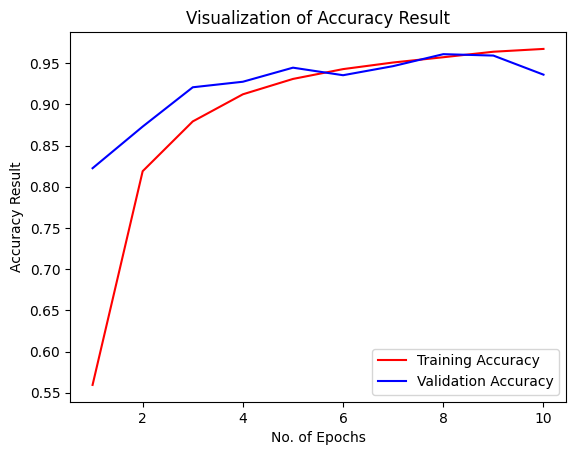

In [40]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [41]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [43]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/vaishnaviawadhiya/Downloads/Plant_Disease_Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [44]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 48s 86ms/step


(array([[1.0000000e+00, 2.7931357e-14, 7.4470290e-17, ..., 1.0551615e-26,
         7.2863858e-30, 1.4568159e-26],
        [1.0000000e+00, 1.4095284e-09, 6.2806341e-15, ..., 9.3264541e-26,
         1.4601675e-23, 2.3994498e-24],
        [1.0000000e+00, 3.9817539e-13, 2.0509168e-14, ..., 2.9250260e-37,
         8.0119635e-31, 7.2238382e-30],
        ...,
        [6.9750089e-04, 1.2077557e-08, 3.4745534e-07, ..., 6.7382899e-07,
         6.3351524e-09, 9.5632529e-01],
        [2.2082884e-05, 8.9195075e-12, 1.3723020e-07, ..., 9.2387904e-07,
         1.0471726e-08, 9.9818510e-01],
        [1.4759254e-22, 4.6452792e-26, 2.0549984e-22, ..., 7.5469369e-19,
         1.1271419e-15, 9.9999905e-01]], dtype=float32),
 (17572, 38))

In [45]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [46]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [47]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2025-04-25 01:22:41.704248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [48]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

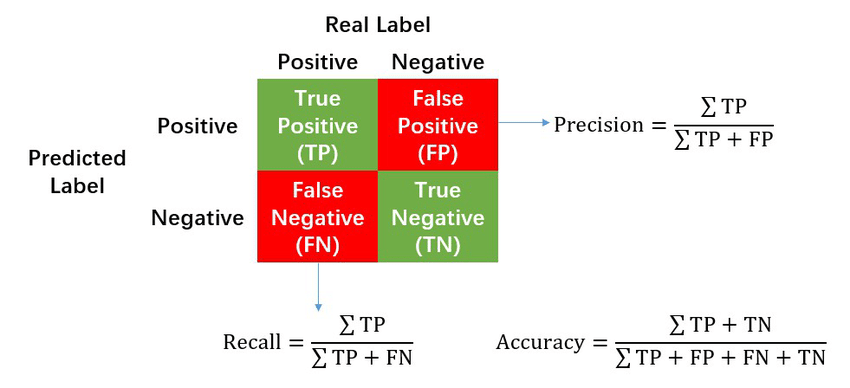

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.70      0.97      0.81       504
                                 Apple___Black_rot       0.96      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.96      0.60      0.73       502
                               Blueberry___healthy       0.94      0.95      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.95      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.89      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

In [51]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[488,   9,   0, ...,   0,   0,   0],
       [  1, 488,   0, ...,   0,   0,   0],
       [  3,   0, 425, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 441,   0],
       [ 17,   0,   1, ...,   1,   0, 376]])

### Confusion Matrix Visualization

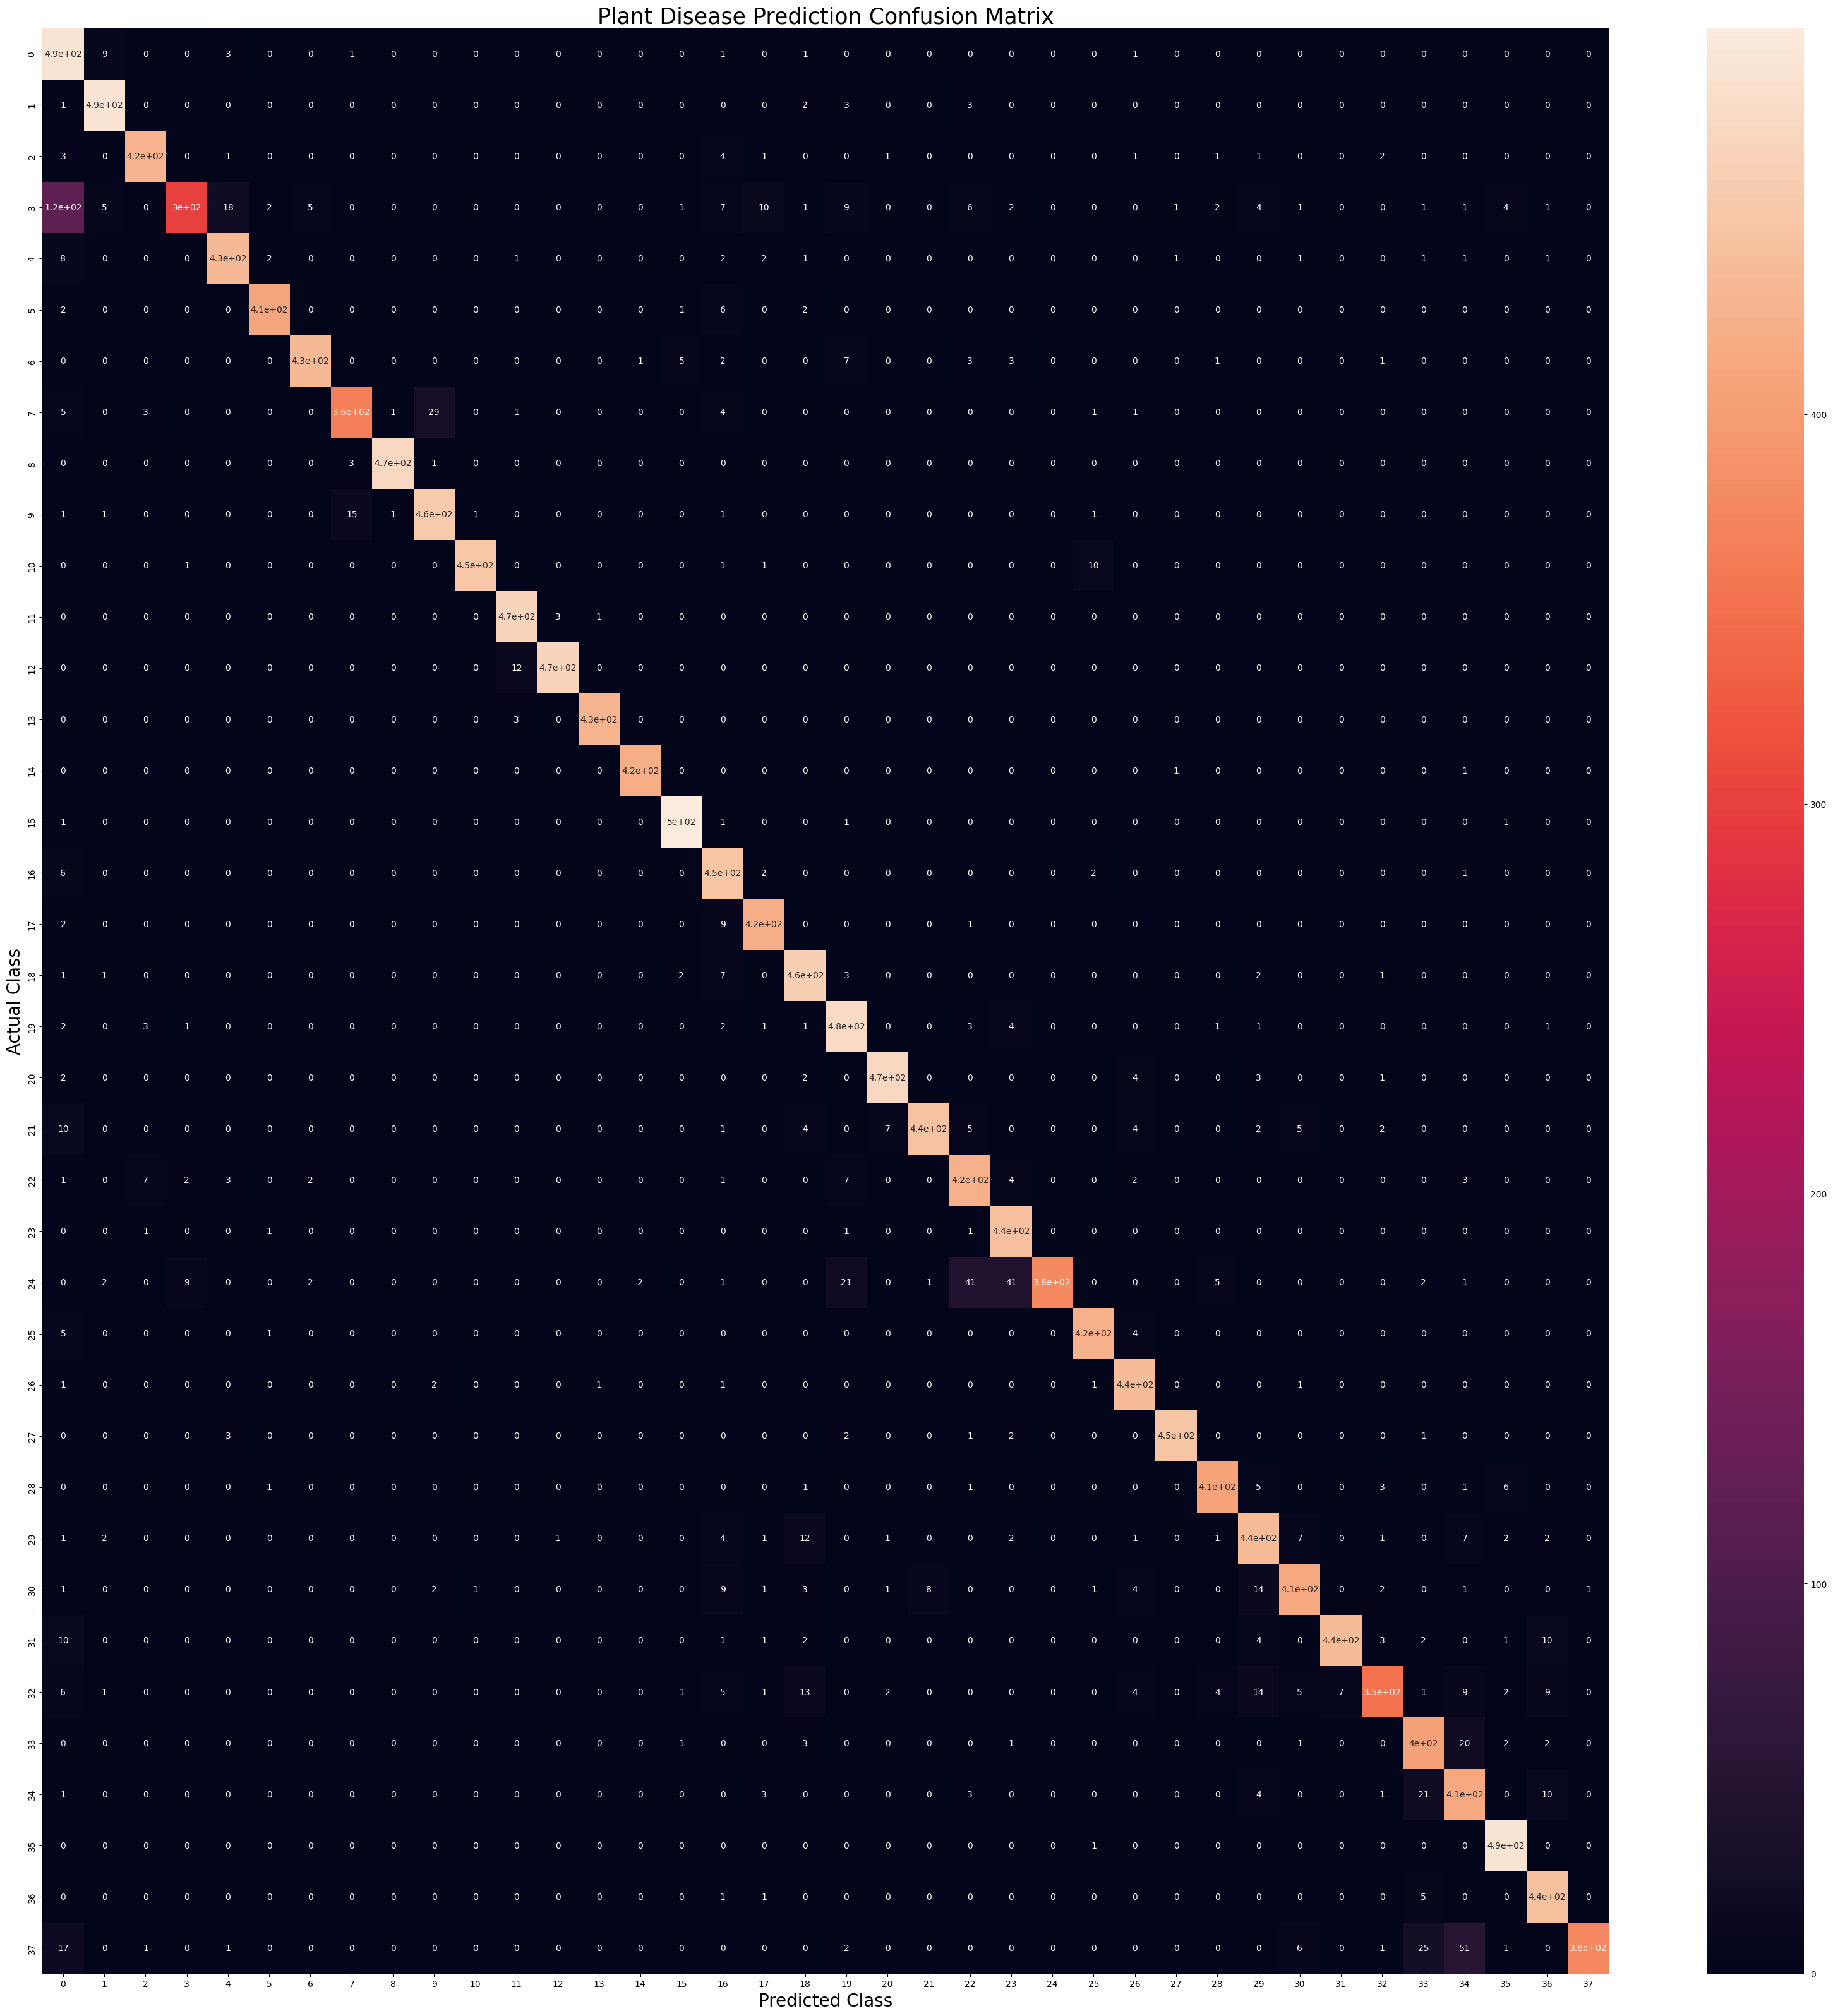

In [54]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()